In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import time
import os
from models import ft_net
from reid_dataset import *
from config import opt

In [2]:
download_dataset('Market1501', opt.data_dir)
download_dataset('DukeMTMC', opt.data_dir)
pytorch_prepare_all(opt.data_dir)

Dataset Check Success: Market1501 exists!
Dataset Check Success: DukeMTMC exists!
Market1501 pytorch directory exists!
DukeMTMC pytorch directory exists!


In [3]:
transform_train_list = [
        transforms.Resize(144),
        transforms.RandomCrop((256,128)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]

transform_val_list = [
        transforms.Resize(size=(256,128)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]

transform_test_list =[
        transforms.Resize((288,144), interpolation=3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
]

In [4]:
data_transforms = {
    'train': transforms.Compose( transform_train_list ),
    'val': transforms.Compose(transform_val_list),
    'test': transforms.Compose(transform_test_list)
}

In [5]:
dataset_name = 'Market1501'
image_datasets = {}
image_datasets['train'] = datasets.ImageFolder(os.path.join(opt.data_dir+'/'+dataset_name+'/pytorch/train_all'),
                                          data_transforms['train'])
image_datasets['val'] = datasets.ImageFolder(os.path.join(opt.data_dir+'/'+dataset_name+'/pytorch/val'),
                                          data_transforms['val'])
image_datasets['query'] = datasets.ImageFolder(os.path.join(opt.data_dir+'/'+ dataset_name + '/pytorch/query'), 
                                          data_transforms['test'])
image_datasets['gallery'] = datasets.ImageFolder(os.path.join(opt.data_dir+'/'+ dataset_name + '/pytorch/gallery'),
                                          data_transforms['test'])

In [6]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=opt.batch_size,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val','query','gallery']}

In [7]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val','query','gallery']}
print(dataset_sizes)

{'query': 3368, 'train': 12936, 'gallery': 19732, 'val': 751}


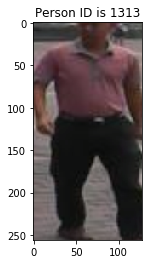

In [8]:
%matplotlib inline
from utils import batch_image_show

n = 31
images_batch, labels = next(iter(dataloaders['train']))
classes = image_datasets['train'].classes
batch_image_show(images_batch,labels,classes, n)

In [9]:
from train import train

In [10]:
import models
model = getattr(models, opt.model)(len(classes))
#model = ft_net(len(classes))
model = model.cuda()
#print(models)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model.parameters(), lr = 0.01, momentum=0.9, weight_decay=5e-4, nesterov=True)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=40, gamma=0.1)

In [12]:
model = train(model, dataloaders, dataset_sizes, criterion, optimizer_ft, exp_lr_scheduler, opt.num_epochs, opt.save_dir, opt.save_rate)

Epoch 1/50
----------
train Loss: 0.1517 Acc: 0.1737
val Loss: 0.1196 Acc: 0.2876
Epoch 2/50
----------
train Loss: 0.0714 Acc: 0.5360
val Loss: 0.0627 Acc: 0.5965
Epoch 3/50
----------


Process Process-23:
KeyboardInterrupt
Process Process-21:
Process Process-22:
Process Process-24:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/m

KeyboardInterrupt: 